In [146]:
import pandas as pd # panda's nickname is pd
import numpy as np # numpy as np
from pandas import DataFrame, Series # for convenience
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from scipy import stats 
import matplotlib.patches as mpatches


# Attendance Comparison

In [2]:
att=pd.read_csv('C:/Users/Jimmy/Documents/mlb attendance.csv')

In [3]:
att

,Year,MLB Total Attendance,MLB Ave Attendance,NL Central,Chicago Cubs
0,2019,"68,506,896",28203,15800.88272,19104.10494
1,2018,"69,671,272",28659,15450.33662,19515.88344
2,2017,"72,678,797",29908,16003.19136,19750.38272
3,2016,"73,159,044",30131,16255.73020,20077.14286
4,2015,"73,719,340",30349,17211.55679,18270.44444
5,2014,"73,739,622",30345,17172.06667,16371.06790
6,2013,"74,027,037",30451,16462.70000,16312.85185


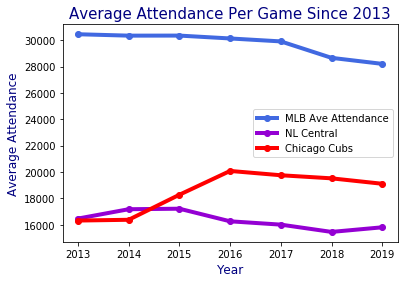

In [4]:
plt.plot( 'Year','MLB Ave Attendance', data=att, marker='o', markerfacecolor='royalblue', markersize=6,
         color='royalblue', linewidth=4)
plt.plot( 'Year','NL Central', data=att, marker='o', markerfacecolor='darkviolet', markersize=6, 
         color='darkviolet', linewidth=4)
plt.plot( 'Year','Chicago Cubs',  data=att, marker='o', markerfacecolor='red', markersize=6, 
         color='red', linewidth=4)
plt.ylabel("Average Attendance",color='navy',fontsize='12')
plt.xlabel("Year",color='navy',fontsize='12')
plt.title("Average Attendance Per Game Since 2013",color='navy',fontsize='15')
plt.legend()

In [5]:
#We are going to index the data to see growth or decline of each category.  Let's set multipliers for indexing 
#(100% divided by the 2013 value for each category )
mlb_multiplier=100/30451
nl_multiplier=100/16462
chc_multiplier=100/16312

In [6]:
index_mlb= att["MLB Ave Attendance"]*(mlb_multiplier)
index_nl= att["NL Central"]*(nl_multiplier)
index_chc= att["Chicago Cubs"]*(chc_multiplier)

In [7]:
df1=pd.DataFrame([att["Year"],index_mlb,index_nl,index_chc]).transpose()
df1

,Year,MLB Ave Attendance,NL Central,Chicago Cubs
0,2019.0,92.617648,95.983980,117.116877
1,2018.0,94.115136,93.854554,119.641267
2,2017.0,98.216807,97.212923,121.078854
3,2016.0,98.949131,98.746994,123.082043
4,2015.0,99.665036,104.553255,112.006158
5,2014.0,99.651900,104.313368,100.362113
6,2013.0,100.000000,100.004252,100.005222


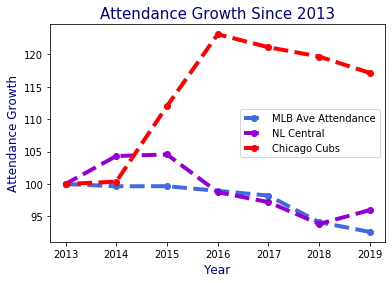

In [8]:
plt.plot( 'Year','MLB Ave Attendance', data=df1, marker='o', markerfacecolor='royalblue',linestyle='--',
         markersize=6,color='royalblue', linewidth=4)
plt.plot( 'Year','NL Central', data=df1, marker='o', markerfacecolor='darkviolet',linestyle='--', markersize=6, 
         color='darkviolet', linewidth=4)
plt.plot( 'Year','Chicago Cubs',  data=df1, marker='o', markerfacecolor='red',linestyle='--', markersize=6, 
         color='red', linewidth=4)
plt.ylabel("Attendance Growth",color='navy',fontsize='12')
plt.xlabel("Year",color='navy',fontsize='12')
plt.title("Attendance Growth Since 2013",color='navy',fontsize='15')
plt.legend(loc='center right')

# Cubs Attendance Analysis

In [73]:
#lets look at factors that affect attendance
cubs19=pd.read_csv('C:/Users/Jimmy/Documents/2019_cubs_home_games.csv')
cubs18=pd.read_csv('C:/Users/Jimmy/Documents/2018_cubs_home_games.csv')
cubs19_lr=pd.read_csv('C:/Users/Jimmy/Documents/2019_cubs_home_games_lr.csv')
cubs18_lr=pd.read_csv('C:/Users/Jimmy/Documents/2018_cubs_home_games_lr.csv')

In [10]:
cubs19.head()

,Home Game Played,Game Played,Month,Day,Date,Tm,Opp,D/N,Promotion,Attendance
0,1,10,April,Monday,"Monday, Apr 8",CHC,PIT,D,1,40692
1,2,11,April,Wednesday,"Wednesday, Apr 10",CHC,PIT,N,0,32798
2,3,12,April,Thursday,"Thursday, Apr 11",CHC,PIT,N,0,31906
3,4,13,April,Friday,"Friday, Apr 12",CHC,LAA,D,0,30102
4,5,14,April,Saturday,"Saturday, Apr 13",CHC,LAA,D,1,38755


In [11]:
cubs18.head()

,Home Game Played,Game Played,Month,Day,Date,Tm,Opp,D/N,Promotion,Attendance
0,1,10,April,Tuesday,"Tuesday, Apr 10",CHC,PIT,D,1,40144
1,2,11,April,Wednesday,"Wednesday, Apr 11",CHC,PIT,N,0,35596
2,3,12,April,Thursday,"Thursday, Apr 12",CHC,PIT,D,0,29949
3,4,13,April,Friday,"Friday, Apr 13",CHC,ATL,D,0,29775
4,5,14,April,Saturday,"Saturday, Apr 14",CHC,ATL,D,1,36788


In [12]:
#plot by month
mon19=cubs19.groupby("Month")['Attendance'].mean()
mon18=cubs18.groupby("Month")['Attendance'].mean()

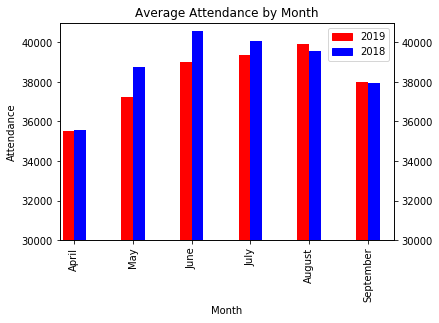

In [135]:
fig = plt.figure() # Create matplotlib figure

month_order=["April","May","June","July","August","September"]

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

mon19.loc[month_order].plot(kind='bar', color='red', ax=ax, width=width, position=1)
mon18.loc[month_order].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Attendance')
ax2.set_ylabel('')

ax.set_ylim([30000,41000])
ax2.set_ylim([30000,41000])

plt.title("Average Attendance by Month")

red_patch = mpatches.Patch(color='red', label='2019')
blue_patch = mpatches.Patch(color='blue', label='2018')

plt.legend(handles=[red_patch,blue_patch])

plt.show()



In [14]:
#plot by Day
day19=cubs19.groupby("Day")['Attendance'].mean()
day18=cubs18.groupby("Day")['Attendance'].mean()

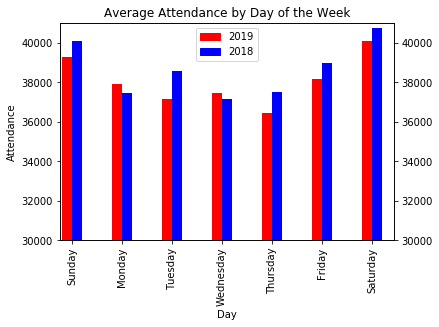

In [134]:
fig = plt.figure() # Create matplotlib figure

day_order = ["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

day19.loc[day_order].plot(kind='bar', color='red', ax=ax, width=width, position=1)
day18.loc[day_order].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Attendance')
ax2.set_ylabel('')

ax.set_ylim([30000,41000])
ax2.set_ylim([30000,41000])

plt.title("Average Attendance by Day of the Week")

red_patch = mpatches.Patch(color='red', label='2019')
blue_patch = mpatches.Patch(color='blue', label='2018')

plt.legend(handles=[red_patch,blue_patch])

plt.show()


In [138]:
#plot by Day
nd19=cubs19.groupby("D/N")['Attendance'].mean()
nd18=cubs18.groupby("D/N")['Attendance'].mean()

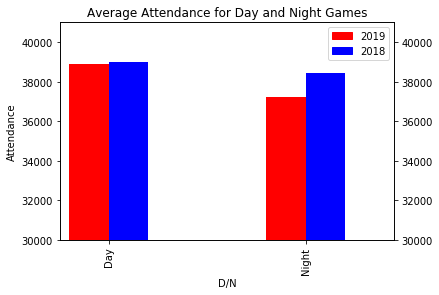

In [155]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

nd19.plot(kind='bar', color='red', ax=ax, width=width, position=1)
nd18.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Attendance')
ax2.set_ylabel('')

ax.set_ylim([30000,41000])
ax2.set_ylim([30000,41000])

plt.xticks(np.arange(2), ['Day', 'Night'])

plt.title("Average Attendance for Day and Night Games")

red_patch = mpatches.Patch(color='red', label='2019')
blue_patch = mpatches.Patch(color='blue', label='2018')

plt.legend(handles=[red_patch,blue_patch])

plt.show()

In [140]:
#plot by Day
p19=cubs19.groupby("Promotion")['Attendance'].mean()
p18=cubs18.groupby("Promotion")['Attendance'].mean()

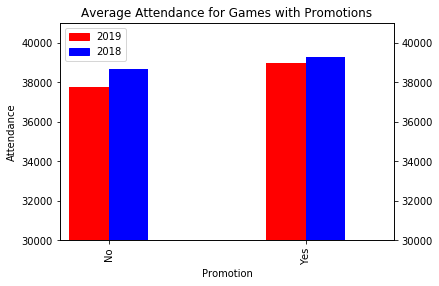

In [154]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

p19.plot(kind='bar', color='red', ax=ax, width=width, position=1)
p18.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Attendance')
ax2.set_ylabel('')

ax.set_ylim([30000,41000])
ax2.set_ylim([30000,41000])



plt.xticks(np.arange(2), ['No', 'Yes'])

plt.title("Average Attendance for Games with Promotions")

red_patch = mpatches.Patch(color='red', label='2019')
blue_patch = mpatches.Patch(color='blue', label='2018')

plt.legend(handles=[red_patch,blue_patch])

plt.show()

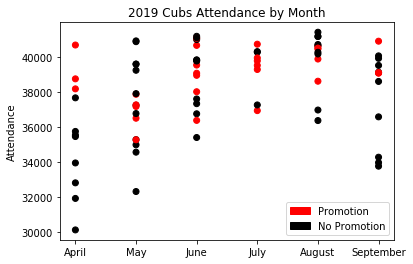

In [150]:
#2019
#attendance by month and promotion
colors = np.where(cubs19['Promotion'] == 1, 'r', 'k')
plt.scatter(x=cubs19['Month'], y=cubs19['Attendance'],c=colors)
plt.ylabel("Attendance")
plt.title("2019 Cubs Attendance by Month")

red_patch = mpatches.Patch(color='red', label='Promotion')
blue_patch = mpatches.Patch(color='black', label='No Promotion')

plt.legend(handles=[red_patch,blue_patch])


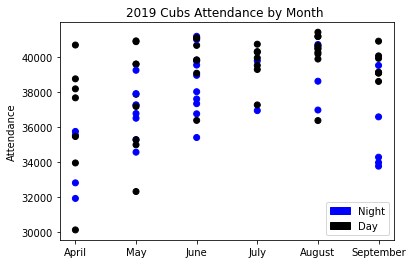

In [151]:
#attendance by month and night or day 
colors = np.where(cubs19_lr['D/N (1=night)'] == 1, 'b', 'k')
plt.scatter(x=cubs19['Month'], y=cubs19_lr['Attendance'],c=colors)
plt.ylabel("Attendance")
plt.title("2019 Cubs Attendance by Month ")

red_patch = mpatches.Patch(color='blue', label='Night')
blue_patch = mpatches.Patch(color='black', label='Day')

plt.legend(handles=[red_patch,blue_patch])


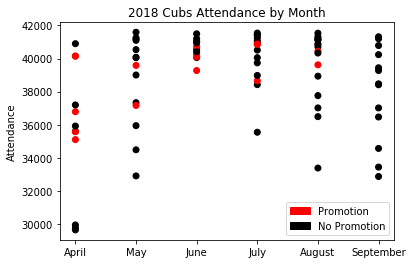

In [152]:
#2018
#attendance by month and promotion
colors = np.where(cubs18['Promotion'] == 1, 'r', 'k')
plt.scatter(x=cubs18['Month'], y=cubs18['Attendance'],c=colors)
plt.ylabel("Attendance")
plt.title("2018 Cubs Attendance by Month")

red_patch = mpatches.Patch(color='red', label='Promotion')
blue_patch = mpatches.Patch(color='black', label='No Promotion')

plt.legend(handles=[red_patch,blue_patch])


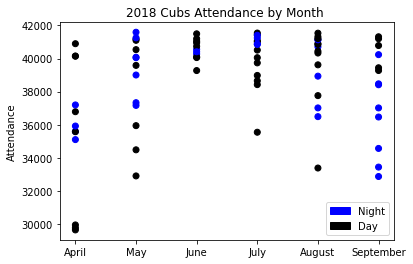

In [156]:
#attendance by month and night or day 
colors = np.where(cubs18_lr['D/N (1=night)'] == 1, 'b', 'k')
plt.scatter(x=cubs18['Month'], y=cubs18_lr['Attendance'],c=colors)
plt.ylabel("Attendance")
plt.title("2018 Cubs Attendance by Month ")

red_patch = mpatches.Patch(color='blue', label='Night')
blue_patch = mpatches.Patch(color='black', label='Day')

plt.legend(handles=[red_patch,blue_patch])


In [174]:
#Let's see breakdown of promotions by days of the week
day19p=cubs19.groupby("Day")['Attendance','Promotion'].sum()
day19g=cubs19.groupby("Day").count()
print(day19p)
print(day19g)

           Attendance  Promotion
Day                             
Friday         533944          9
Monday         341144          2
Saturday       561282          1
Sunday         510303         11
Thursday       327875          3
Tuesday        408465          2
Wednesday      411852          2
           Home Game Played  Game Played  Month  Date  Tm  Opp  D/N  \
Day                                                                   
Friday                   14           14     14    14  14   14   14   
Monday                    9            9      9     9   9    9    9   
Saturday                 14           14     14    14  14   14   14   
Sunday                   13           13     13    13  13   13   13   
Thursday                  9            9      9     9   9    9    9   
Tuesday                  11           11     11    11  11   11   11   
Wednesday                11           11     11    11  11   11   11   

           Promotion  Attendance  
Day                         

In [188]:
#Let's see breakdown of promotions by month
m19p=cubs19.groupby("Month")['Attendance','Promotion'].sum()
m19g=cubs19.groupby("Month").count()
print(m19p)
print(m19g)

           Attendance  Promotion
Month                           
April          390769          3
August         559076          5
July           354094          6
June           663548          7
May            633359          5
September      494019          4
           Home Game Played  Game Played  Day  Date  Tm  Opp  D/N  Promotion  \
Month                                                                          
April                    11           11   11    11  11   11   11         11   
August                   14           14   14    14  14   14   14         14   
July                      9            9    9     9   9    9    9          9   
June                     17           17   17    17  17   17   17         17   
May                      17           17   17    17  17   17   17         17   
September                13           13   13    13  13   13   13         13   

           Attendance  
Month                  
April              11  
August             14  

In [175]:
day18p=cubs18.groupby("Day")['Attendance','Promotion'].sum()
day18g=cubs18.groupby("Day").count()
print(day18p)
print(day18g)

           Attendance  Promotion
Day                             
Friday         506311          5
Monday         262036          1
Saturday       570425          2
Sunday         480743          2
Thursday       337495          0
Tuesday        539989          6
Wednesday      445640          2
           Home Game Played  Game Played  Month  Date  Tm  Opp  D/N  \
Day                                                                   
Friday                   13           13     13    13  13   13   13   
Monday                    7            7      7     7   7    7    7   
Saturday                 14           14     14    14  14   14   14   
Sunday                   12           12     12    12  12   12   12   
Thursday                  9            9      9     9   9    9    9   
Tuesday                  14           14     14    14  14   14   14   
Wednesday                12           12     12    12  12   12   12   

           Promotion  Attendance  
Day                         

In [190]:
#Let's see breakdown of promotions by month
m18p=cubs18.groupby("Month")['Attendance','Promotion'].sum()
m18g=cubs18.groupby("Month").count()
print(m18p)
print(m18g)

           Attendance  Promotion
Month                           
April          426743          5
August         632764          3
July           601335          4
June           446085          4
May            542209          2
September      493503          0
           Home Game Played  Game Played  Day  Date  Tm  Opp  D/N  Promotion  \
Month                                                                          
April                    12           12   12    12  12   12   12         12   
August                   16           16   16    16  16   16   16         16   
July                     15           15   15    15  15   15   15         15   
June                     11           11   11    11  11   11   11         11   
May                      14           14   14    14  14   14   14         14   
September                13           13   13    13  13   13   13         13   

           Attendance  
Month                  
April              12  
August             16  

In [87]:
#comparison of promotions and night games per season
print("Sum of Promotions in 2019")
print(cubs19_lr["Promotion"].sum())
print()
print("Sum of Promotions in 2018")
print(cubs18_lr["Promotion"].sum())
print()
print("Sum of Night Games in 2019")
print(cubs19_lr["D/N (1=night)"].sum())
print()
print("Sum of Night Games in 2018")
print(cubs18_lr["D/N (1=night)"].sum())
print()

Sum of Promotions in 2019
30

Sum of Promotions in 2018
18

Sum of Night Games in 2019
33

Sum of Night Games in 2018
31



# Linear Regression

In [179]:
#Regression analysis
# Let's put together x and y training and test sets
#2019 data
x = (cubs19_lr[['Month','Day','D/N (1=night)','Promotion']]).values
y = (cubs19_lr['Attendance']).values

In [180]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#take random shuffle of data for training and testing datasets - 20% of data used for test
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.05)

In [181]:
#use to training data and compare to test data set
lin= LinearRegression()
linfit=lin.fit(x_train,y_train)

In [113]:
#Find RMSE
y_pred=LinearRegression.predict(linfit, x_test)
print( sqrt(mean_squared_error(y_test,y_pred)))

1843.0863190903237


In [114]:
y_test.mean()

39026.4

In [115]:
y_pred.mean()

38049.912501545885

In [116]:
x_test

array([[7, 1, 0, 1],
       [7, 2, 1, 1],
       [8, 6, 0, 0],
       [5, 2, 1, 0],
       [8, 2, 1, 0]], dtype=int64)

In [117]:
y_test

array([39291, 36935, 40276, 37909, 40721], dtype=int64)

In [177]:
y_pred

array([37727.77102983, 37754.28435202, 37936.28987837, 36893.11202103,
       36812.12766273])

In [88]:
#Regression analysis
# Let's put together x and y training and test sets
#2018 data
x = (cubs18_lr[['Month','Day','D/N (1=night)','Promotion']]).values
y = (cubs18_lr['Attendance']).values

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#take random shuffle of data for training and testing datasets - 20% of data used for test
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.05)

In [120]:
#use to training data and compare to test data set
lin= LinearRegression()
linfit=lin.fit(x_train,y_train)

In [121]:
#Find RMSE
y_pred=LinearRegression.predict(linfit, x_test)
print( sqrt(mean_squared_error(y_test,y_pred)))

1089.4211744679594


In [122]:
y_test.mean()

37588.8

In [123]:
y_pred.mean()

37424.71698879651

In [124]:
x_test

array([[5, 7, 0, 0],
       [4, 1, 0, 1],
       [6, 4, 1, 1],
       [6, 4, 1, 0],
       [6, 3, 1, 0]], dtype=int64)

In [125]:
y_test

array([39598, 38181, 38017, 35395, 36753], dtype=int64)

In [126]:
y_pred

array([37727.77102983, 37754.28435202, 37936.28987837, 36893.11202103,
       36812.12766273])